# Credit Card Fraud Detection

This notebook uses data from [kaggle](https://www.kaggle.com) to test different methods on unbalanced data. The revelent dataset can be found [here](https://www.kaggle.com/dalpozz/creditcardfraud/)

## First Impression

In [9]:
import pandas as pd
file = 'creditcard.csv'
data = pd.read_csv(file,delimiter = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


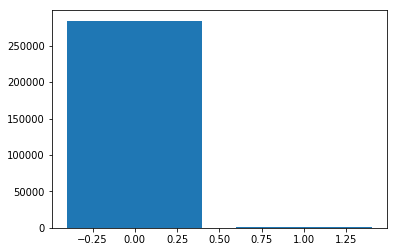

0    284315
1       492
Name: Class, dtype: int64

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def bar_graph(data):
	one = data.loc[data['Class'] == 1].values  #fraud transaction
	zero = data.loc[data['Class'] == 0].values  #normal transaction
	bar_data = [len(zero),len(one)]
	plt.bar(height = bar_data, left = [0,1])
	plt.show()
bar_graph(data)
data['Class'].value_counts()

From the bar graph above, we can tell that the data is highly unbalanced. To deal with unbalance data, I trained a classifier on a smaller dataset with 1:1 ratio of positive and negative labels.

## ReSampling

In [11]:
import random
def reSample(data,times):
	#Sample size = times*number of fraud transactions
	fraud_num = len(data.loc[data['Class'] == 1].values)
	normal_num = len(data.loc[data['Class'] == 0].values)
	#sample_index = random.sample(range(0, normal_num), fraud_num)
	sample_index = np.random.choice(normal_num,(times*fraud_num))
	data_sample = data.loc[sample_index]
	data_sample = pd.concat([data_sample, data.loc[data['Class'] == 1]])
	#print (data_sample)
	return data_sample
data_sample = reSample(data,1)  #1:1
data_sample['Class'].value_counts()

1    494
0    490
Name: Class, dtype: int64

## Confusion Matrix??

## Logistic Regression

In [27]:
from sklearn.cross_validation import train_test_split
data_sample = reSample(data,1)
#Seperate input date to X and Y
Y = data_sample['Class'].values
data_sample = data_sample.drop('Class', axis = 1)
X = data_sample.values

#Train set and test set split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)  #random state??
print("Train set size: ", len(X_train))
print("Test set size: ", len(X_test))
print("Total: ", len(X_train)+len(X_test))

#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1)  #C value ? test later
log.fit(X_train, Y_train)
prediction = log.predict(X_test)

#accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test,prediction))

Train set size:  688
Test set size:  296
Total:  984
0.915540540541


Test with different C values

In [45]:
c_set = [0.01,0.1,1,10,100]  #only did in one iteration
for c_val in c_set:
    log_2 = LogisticRegression(C = c_val, penalty = 'l2')
    log_2.fit(X_train, Y_train)
    prediction_2 = log_2.predict(X_test)
    print ("C value:", c_val, "Accuracy Score: ", accuracy_score(Y_test, prediction_2))

C value: 0.01 Accuracy Score:  0.915540540541
C value: 0.1 Accuracy Score:  0.935810810811
C value: 1 Accuracy Score:  0.915540540541
C value: 10 Accuracy Score:  0.915540540541
C value: 100 Accuracy Score:  0.915540540541


Therefore the best C value here is 0.1
Update the LR model with new C value

In [46]:
log = LogisticRegression(C=0.1,penalty = 'l2')
log.fit(X_train, Y_train)
prediction = log.predict(X_test)
print (accuracy_score(Y_test,prediction))

0.935810810811
